# Import libraries

In [140]:
import pandas as pd
from scipy import stats
from scipy.stats import skew
import numpy as np
import matplotlib.pyplot as plt

## Import data and remove the data without salary value

In [141]:
file = r'survey_results_public.csv'
raw_data = pd.read_csv(file)
data = raw_data.dropna(subset=["ConvertedCompYearly"])
data

,ResponseId,Q120,MainBranch,Age,Employment,RemoteWork,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,Frequency_1,Frequency_2,Frequency_3,TimeSearching,TimeAnswering,ProfessionalTech,Industry,SurveyLength,SurveyEase,ConvertedCompYearly
1,2,I agree,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,Hobby;Contribute to open-source projects;Boots...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;Friend or fam...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,Never,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,285000.0
2,3,I agree,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby;Professional development or self-paced l...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,30-60 minutes a day,30-60 minutes a day,DevOps function;Microservices;Automated testin...,"Information Services, IT, Software Development...",Appropriate in length,Easy,250000.0
3,4,I agree,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)",Hobby,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Colleague;Friend or family member;Other online...,Formal documentation provided by the owner of ...,...,1-2 times a week,10+ times a week,1-2 times a week,15-30 minutes a day,30-60 minutes a day,Automated testing;Continuous integration (CI) ...,NaN,Appropriate in length,Easy,156000.0
4,5,I agree,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,Hobby;Contribute to open-source projects;Profe...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Online Courses or Certi...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,60-120 minutes a day,30-60 minutes a day,Microservices;Automated testing;Observability ...,Other,Appropriate in length,Neither easy nor difficult,23456.0
5,6,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Hobby;Professional development or self-paced l...,Some college/university study without earning ...,Books / Physical media;Colleague;Online Course...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,3-5 times a week,30-60 minutes a day,15-30 minutes a day,DevOps function;Microservices;Observability to...,Other,Appropriate in length,Neither easy nor difficult,96828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89162,89163,I agree,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,I don’t code outside of work,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Formal documentation provided by the owner of ...,...,6-10 times a week,6-10 times a week,3-5 times a week,60-120 minutes a day,60-120 minutes a day,Automated testing;Developer portal or other ce...,"Information Services, IT, Software Development...",Appropriate in length,Neither easy nor difficult,50719.0
89166,89167,I agree,I am a developer by profession,18-24 years old,"Employed, full-time;Independent contractor, fr...",In-person,Contribute to open-source projects;Professiona...,Some college/university study without earning ...,Books / Physical media;Hackathons (virtual or ...,Formal documentation provided by the owner of ...,...,1-2 times a week,1-2 times a week,1-2 times a week,15-30 minutes a day,15-30 minutes a day,DevOps function;Microservices;Continuous integ...,Financial Services,Appropriate in length,Neither easy nor difficult,16917.0
89167,89168,I agree,I am a developer by professio

In [142]:
data.columns

Index(['ResponseId', 'Q120', 'MainBranch', 'Age', 'Employment', 'RemoteWork',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       'LearnCodeCoursesCert', 'YearsCode', 'YearsCodePro', 'DevType',
       'OrgSize', 'PurchaseInfluence', 'TechList', 'BuyNewTool', 'Country',
       'Currency', 'CompTotal', 'LanguageHaveWorkedWith',
       'LanguageWantToWorkWith', 'DatabaseHaveWorkedWith',
       'DatabaseWantToWorkWith', 'PlatformHaveWorkedWith',
       'PlatformWantToWorkWith', 'WebframeHaveWorkedWith',
       'WebframeWantToWorkWith', 'MiscTechHaveWorkedWith',
       'MiscTechWantToWorkWith', 'ToolsTechHaveWorkedWith',
       'ToolsTechWantToWorkWith', 'NEWCollabToolsHaveWorkedWith',
       'NEWCollabToolsWantToWorkWith', 'OpSysPersonal use',
       'OpSysProfessional use', 'OfficeStackAsyncHaveWorkedWith',
       'OfficeStackAsyncWantToWorkWith', 'OfficeStackSyncHaveWorkedWith',
       'OfficeStackSyncWantToWorkWith', 'AISearchHaveWorkedWith',
       'AISearchWan

## Only the columns that are use for research is kept

In [143]:
columns_to_keep = [
 'MainBranch', 'Age', 'Employment', 'RemoteWork',
 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType',
 'OrgSize', 'PurchaseInfluence', 'Country', 'Currency', 
 'CompTotal', 'LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
 'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith','ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith',
 'OfficeStackAsyncHaveWorkedWith', 'OfficeStackSyncHaveWorkedWith', 'ICorPM', 'WorkExp', 'ConvertedCompYearly']

In [144]:
data = data.loc[:, columns_to_keep]
data.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,...,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,ICorPM,WorkExp,ConvertedCompYearly
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,...,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,Electron;React Native;Tauri,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Vim;Visual Studio Code,Asana;Basecamp;GitHub Discussions;Jira;Linear;...,Cisco Webex Teams;Discord;Google Chat;Google M...,People manager,10.0,285000.0
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,...,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Emacs;Helix,Markdown File;Stack Overflow for Teams,Microsoft Teams;Slack;Zoom,Individual contributor,23.0,250000.0
3,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",100 to 499 employees,I have some influence,...,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,NaN,Homebrew;npm;Vite;Webpack;Yarn,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Individual contributor,7.0,156000.0
4,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",20 to 99 employees,I have some influence,...,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Express;Gatsby;NestJS;Next.js;Node.js;React,NaN,Docker;npm;Webpack;Yarn,Vim;Visual Studio Code,Confluence;Jira;Notion,Discord;Google Meet;Slack;Zoom,Individual contributor,6.0,23456.0
5,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,21,"Developer, back-end",100 to 499 employees,I have little or no influence,...,Amazon Web Services (AWS);Cloudflare;Google Cloud,Angular;Express;NestJS;Node.js,NaN,Docker;Homebrew;Kubernetes;npm;pnpm;Terraform,Helix;Neovim,Jira;Markdown File;Notion;Stack Overflow for T...,Google Meet;Microsoft Teams;Slack;Zoom,Individual contributor,22.0,96828.0


### Function for plotting the histogram

In [145]:
def plot_histogram_with_stats(data, column):
    """
    Plot a histogram of a specified column from a DataFrame and display statistical information.

    Args:
        data (pandas.DataFrame): The DataFrame containing the data.
        column (str): The name of the column to plot the histogram for.

    Returns:
        None
    """
    # Set the figure size
    plt.figure(figsize=(8, 6))
    
    # Plot the histogram of the specified column with 1000 bins
    plt.hist(data[column], bins=1000)
    
    # Calculate statistical measures
    mean = data[column].mean()
    median = data[column].median()
    std_dev = data[column].std()
    skewness = skew(data[column])
    
    # Plot vertical lines for the mean and median
    plt.axvline(mean, color='red', linestyle='dashed', linewidth=2, label='Mean')
    plt.axvline(median, color='green', linestyle='dashed', linewidth=2, label='Median')
    
    # Create a text string with the statistical information
    stats_text = f'Mean: {mean:.2f}\nMedian: {median:.2f}\nStd. Dev.: {std_dev:.2f}\nSkewness: {skewness:.2f}'
    
    # Add the statistical information as text to the plot
    plt.text(0.95, 0.95, stats_text, transform=plt.gca().transAxes,
             fontsize=12, verticalalignment='top', horizontalalignment='right',
             bbox={'facecolor': 'white', 'alpha': 0.8, 'pad': 5})
    
    # Set the x-label, y-label, and title of the plot
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column}')
    
    # Display the plot
    plt.show()

#### The histogram of the salary data with outliers.

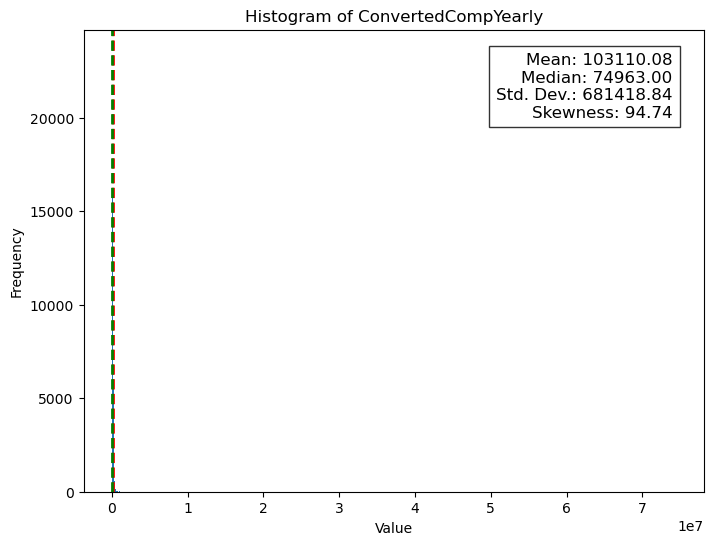

In [146]:
plot_histogram_with_stats(data, 'ConvertedCompYearly')

## Remove outliers

### Percentile-based method

In [147]:
def remove_outliers_percentile(df, column):
    """
    Remove outliers from a DataFrame using the percentile method based on a specific column.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        column (str): The name of the column to apply outlier removal.

    Returns:
        pandas.DataFrame: The DataFrame with outliers removed.
    """
    #set the percentiles
    lower_percentile=5
    upper_percentile=95
    
    # Define the lower and upper bounds for outliers
    lower_bound = np.percentile(df[column], lower_percentile)
    upper_bound = np.percentile(df[column], upper_percentile)
    
    # Filter the DataFrame to remove outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

In [148]:
percentile_data = remove_outliers_percentile(data, 'ConvertedCompYearly')
percentile_data

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,...,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,ICorPM,WorkExp,ConvertedCompYearly
3,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",100 to 499 employees,I have some influence,...,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,NaN,Homebrew;npm;Vite;Webpack;Yarn,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Individual contributor,7.0,156000.0
4,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",20 to 99 employees,I have some influence,...,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Express;Gatsby;NestJS;Next.js;Node.js;React,NaN,Docker;npm;Webpack;Yarn,Vim;Visual Studio Code,Confluence;Jira;Notion,Discord;Google Meet;Slack;Zoom,Individual contributor,6.0,23456.0
5,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,21,"Developer, back-end",100 to 499 employees,I have little or no influence,...,Amazon Web Services (AWS);Cloudflare;Google Cloud,Angular;Express;NestJS;Node.js,NaN,Docker;Homebrew;Kubernetes;npm;pnpm;Terraform,Helix;Neovim,Jira;Markdown File;Notion;Stack Overflow for T...,Google Meet;Microsoft Teams;Slack;Zoom,Individual contributor,22.0,96828.0
6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,4,3,"Developer, full-stack","1,000 to 4,999 employees",I have little or no influence,...,Amazon Web Services (AWS);Digital Ocean,AngularJS;jQuery;Node.js;Phoenix;Ruby on Rails...,RabbitMQ;Spring Framework,Bun;Cargo;Chocolatey;Docker;Homebrew;Kubernete...,Emacs;IntelliJ IDEA;RubyMine;Visual Studio Cod...,Jira,Slack,Individual contributor,4.0,135000.0
7,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,3,"Developer, full-stack",10 to 19 employees,I have some influence,...,Amazon Web Services (AWS);Fly.io;Netlify;Vercel,Angular;Express;Next.js;Node.js;React,NumPy;Pandas;Scikit-Learn;Tauri;TensorFlow,Ansible;Cargo;Docker;Homebrew;Make;npm;Pip;pnp...,DataGrip;IPython;Neovim;Vim;Visual Studio Code,Markdown File;Notion,Microsoft Teams,NaN,5.0,80000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89162,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",30,24,"Developer, back-end","5,000 to 9,999 employees",I have some influence,...,NaN,NaN,NaN,CMake;GNU GCC;Make;MSBuild;MSVC;QMake;Visual S...,Jupyter Notebook/JupyterLab;Notepad++;Visual S...,Doxygen;Jira;Markdown File,Google Chat;Google Meet;Skype;Zoom,People manager,25.0,50719.0
89166,I am a developer by profession,18-24 years old,"Employed, full-time;Independent contractor, fr...",In-person,Some college/university study without earning ...,7,2,"Developer, full-stack",20 to 99 employees,I have some influence,...,Firebase;Heroku,ASP.NET;ASP.NET CORE;jQuery,.NET (5+) ;Apache Kafka;OpenGL;Qt,Chocolatey;GNU GCC;Homebrew;LLVM's Clang;npm;N...,Android Studio;Atom;CLion;DataGrip;Nano;Neovim...,Confluence;Jira;Miro;Trello,Discord;Google Meet;Mattermost;Telegram,Individual contributor,3.0,16917.0
89167,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,2,"Developer, mobile",20 to 99 employees,I have little or no influence,...,NaN,Express;Node.js;React;Svelte,Flutter;NumPy;Pandas;Scikit-Learn,Homebrew;Vite,And

In [149]:
percentile_data.describe()

,CompTotal,WorkExp,ConvertedCompYearly
count,4.331300e+04,29537.000000,43313.000000
mean,1.035965e+07,11.458848,85331.997022
std,1.819092e+08,8.716381,50656.085882
min,3.700000e+03,0.000000,6503.000000
25%,6.400000e+04,5.000000,47914.000000
50%,1.100000e+05,9.000000,74963.000000
75%,2.000000e+05,16.000000,116190.000000
max,9.504000e+09,50.000000,230000.000000


### Interquartile Range (IQR) method.

In [150]:
def remove_outliers_iqr(df, column):
    """
    Remove outliers from a DataFrame using the IQR method based on a specific column.

    Args:
        df (pandas.DataFrame): The input DataFrame.
        column (str): The name of the column to apply outlier removal.

    Returns:
        pandas.DataFrame: The DataFrame with outliers removed.
    """
    # Calculate the first and third quartiles
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    
    # Calculate the IQR
    iqr = q3 - q1
    
    # Define the lower and upper bounds for outliers
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    # Filter the DataFrame to remove outliers
    filtered_df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    
    return filtered_df

In [151]:
iqr_data = remove_outliers_iqr(data, 'ConvertedCompYearly')
iqr_data.head()

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,...,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,ICorPM,WorkExp,ConvertedCompYearly
3,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",100 to 499 employees,I have some influence,...,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,NaN,Homebrew;npm;Vite;Webpack;Yarn,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Individual contributor,7.0,156000.0
4,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",20 to 99 employees,I have some influence,...,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Express;Gatsby;NestJS;Next.js;Node.js;React,NaN,Docker;npm;Webpack;Yarn,Vim;Visual Studio Code,Confluence;Jira;Notion,Discord;Google Meet;Slack;Zoom,Individual contributor,6.0,23456.0
5,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,21,"Developer, back-end",100 to 499 employees,I have little or no influence,...,Amazon Web Services (AWS);Cloudflare;Google Cloud,Angular;Express;NestJS;Node.js,NaN,Docker;Homebrew;Kubernetes;npm;pnpm;Terraform,Helix;Neovim,Jira;Markdown File;Notion;Stack Overflow for T...,Google Meet;Microsoft Teams;Slack;Zoom,Individual contributor,22.0,96828.0
6,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,4,3,"Developer, full-stack","1,000 to 4,999 employees",I have little or no influence,...,Amazon Web Services (AWS);Digital Ocean,AngularJS;jQuery;Node.js;Phoenix;Ruby on Rails...,RabbitMQ;Spring Framework,Bun;Cargo;Chocolatey;Docker;Homebrew;Kubernete...,Emacs;IntelliJ IDEA;RubyMine;Visual Studio Cod...,Jira,Slack,Individual contributor,4.0,135000.0
7,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,3,"Developer, full-stack",10 to 19 employees,I have some influence,...,Amazon Web Services (AWS);Fly.io;Netlify;Vercel,Angular;Express;Next.js;Node.js;React,NumPy;Pandas;Scikit-Learn;Tauri;TensorFlow,Ansible;Cargo;Docker;Homebrew;Make;npm;Pip;pnp...,DataGrip;IPython;Neovim;Vim;Visual Studio Code,Markdown File;Notion,Microsoft Teams,NaN,5.0,80000.0


In [152]:
iqr_data.describe()

,CompTotal,WorkExp,ConvertedCompYearly
count,4.581300e+04,31260.000000,45813.000000
mean,1.095693e+07,11.211740,81323.397464
std,2.000952e+08,8.715019,53067.505365
min,1.000000e+00,0.000000,1.000000
25%,6.000000e+04,5.000000,42836.000000
50%,1.100000e+05,9.000000,72000.000000
75%,2.000000e+05,15.000000,112377.000000
max,1.000000e+10,50.000000,238000.000000


### Z-score method

In [153]:
def filter_by_zscore(data, column_for_z):
    """
    Filters a DataFrame based on the z-score of a specified column and drops the
    z-score column from the resulting DataFrame.

    Args:
        data: The input DataFrame.
        column: The name of the column to calculate the z-score for.

    Returns:
        A DataFrame containing only the rows where the z-score of the specified
        column is between -3 and 3 (inclusive).
    """
    
    data['Zscore'] = stats.zscore(data[column_for_z])
    filtered_data = data[(data['Zscore'] >= -3) & (data['Zscore'] <= 3)]
    filtered_data = filtered_data.drop(columns=['Zscore'])
    return filtered_data

In [154]:
z_data = filter_by_zscore(data,'ConvertedCompYearly')
z_data

,MainBranch,Age,Employment,RemoteWork,EdLevel,YearsCode,YearsCodePro,DevType,OrgSize,PurchaseInfluence,...,PlatformHaveWorkedWith,WebframeHaveWorkedWith,MiscTechHaveWorkedWith,ToolsTechHaveWorkedWith,NEWCollabToolsHaveWorkedWith,OfficeStackAsyncHaveWorkedWith,OfficeStackSyncHaveWorkedWith,ICorPM,WorkExp,ConvertedCompYearly
1,I am a developer by profession,25-34 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",18,9,"Senior Executive (C-Suite, VP, etc.)",2 to 9 employees,I have a great deal of influence,...,Amazon Web Services (AWS);Netlify;Vercel,Next.js;React;Remix;Vue.js,Electron;React Native;Tauri,Docker;Kubernetes;npm;Pip;Vite;Webpack;Yarn,Vim;Visual Studio Code,Asana;Basecamp;GitHub Discussions;Jira;Linear;...,Cisco Webex Teams;Discord;Google Chat;Google M...,People manager,10.0,285000.0
2,I am a developer by profession,45-54 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",27,23,"Developer, back-end","5,000 to 9,999 employees",I have some influence,...,Amazon Web Services (AWS);Google Cloud;OpenSta...,NaN,NaN,Cargo;Docker;Kubernetes;Make;Nix,Emacs;Helix,Markdown File;Stack Overflow for Teams,Microsoft Teams;Slack;Zoom,Individual contributor,23.0,250000.0
3,I am a developer by profession,25-34 years old,"Employed, full-time","Hybrid (some remote, some in-person)","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",100 to 499 employees,I have some influence,...,Cloudflare;Heroku,Node.js;React;Ruby on Rails;Vue.js;WordPress,NaN,Homebrew;npm;Vite;Webpack;Yarn,IntelliJ IDEA;Vim;Visual Studio Code;WebStorm,Jira,Discord;Google Meet;Microsoft Teams;Slack;Zoom,Individual contributor,7.0,156000.0
4,I am a developer by profession,25-34 years old,"Employed, full-time;Independent contractor, fr...",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",20 to 99 employees,I have some influence,...,Amazon Web Services (AWS);Firebase;Heroku;Netl...,Express;Gatsby;NestJS;Next.js;Node.js;React,NaN,Docker;npm;Webpack;Yarn,Vim;Visual Studio Code,Confluence;Jira;Notion,Discord;Google Meet;Slack;Zoom,Individual contributor,6.0,23456.0
5,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Some college/university study without earning ...,21,21,"Developer, back-end",100 to 499 employees,I have little or no influence,...,Amazon Web Services (AWS);Cloudflare;Google Cloud,Angular;Express;NestJS;Node.js,NaN,Docker;Homebrew;Kubernetes;npm;pnpm;Terraform,Helix;Neovim,Jira;Markdown File;Notion;Stack Overflow for T...,Google Meet;Microsoft Teams;Slack;Zoom,Individual contributor,22.0,96828.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89162,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",30,24,"Developer, back-end","5,000 to 9,999 employees",I have some influence,...,NaN,NaN,NaN,CMake;GNU GCC;Make;MSBuild;MSVC;QMake;Visual S...,Jupyter Notebook/JupyterLab;Notepad++;Visual S...,Doxygen;Jira;Markdown File,Google Chat;Google Meet;Skype;Zoom,People manager,25.0,50719.0
89166,I am a developer by profession,18-24 years old,"Employed, full-time;Independent contractor, fr...",In-person,Some college/university study without earning ...,7,2,"Developer, full-stack",20 to 99 employees,I have some influence,...,Firebase;Heroku,ASP.NET;ASP.NET CORE;jQuery,.NET (5+) ;Apache Kafka;OpenGL;Qt,Chocolatey;GNU GCC;Homebrew;LLVM's Clang;npm;N...,Android Studio;Atom;CLion;DataGrip;Nano;Neovim...,Confluence;Jira;Miro;Trello,Discord;Google Meet;Mattermost;Telegram,Individual contributor,3.0,16917.0
89167,I am a developer by profession,18-24 years old,"Employed, full-time",Remote,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,2,"Developer, mobile",20 to 99 employees,I have little or no influence,...,NaN,Express;Node.js;React;Svelte,Flutter;NumPy;Pandas;Scikit-Learn,Homebrew;Vite,A

In [155]:
z_data.describe()

,CompTotal,WorkExp,ConvertedCompYearly
count,4.799300e+04,32624.000000,4.799300e+04
mean,1.155570e+07,11.434527,9.389159e+04
std,2.339992e+08,8.816838,8.783821e+04
min,1.000000e+00,0.000000,1.000000e+00
25%,6.400000e+04,5.000000,4.390700e+04
50%,1.150000e+05,9.000000,7.496300e+04
75%,2.336640e+05,16.000000,1.213420e+05
max,1.980000e+10,50.000000,2.141791e+06


## The histogram of salary after removing outliers by different methods

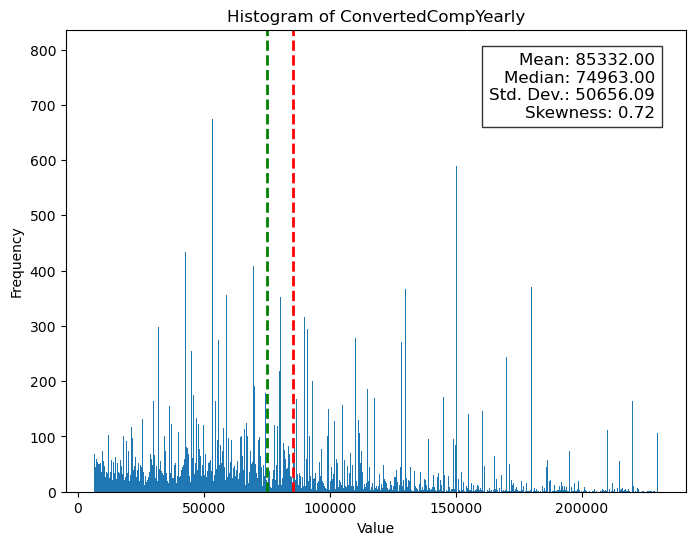

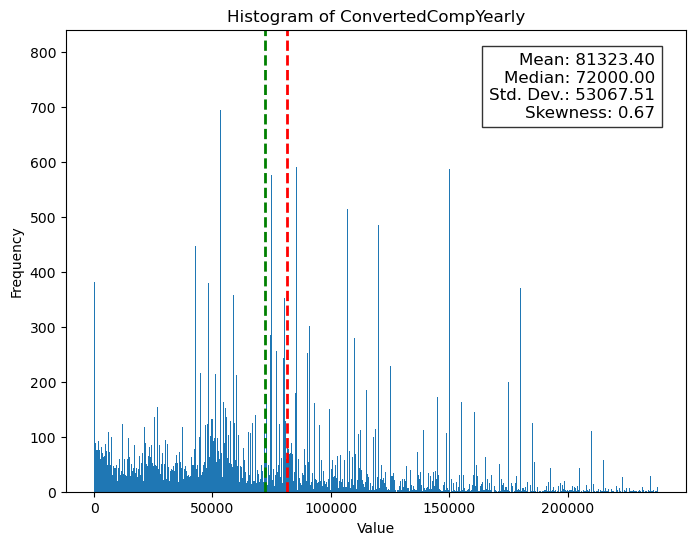

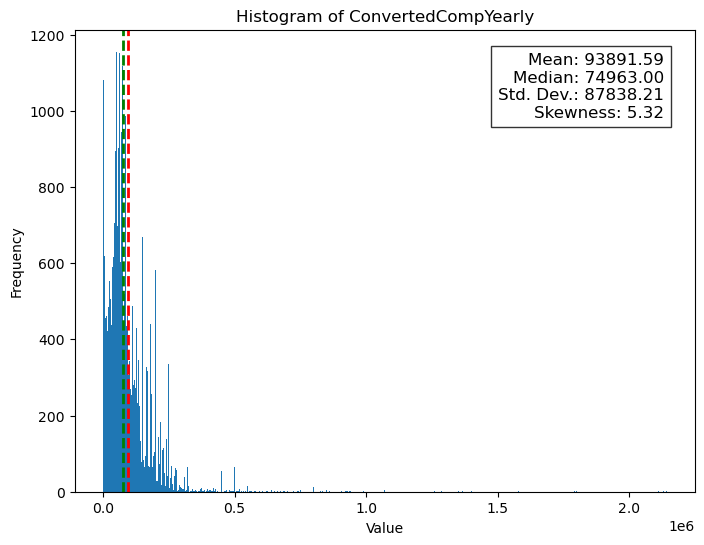

In [156]:
plot_histogram_with_stats(percentile_data, 'ConvertedCompYearly')

plot_histogram_with_stats(iqr_data, 'ConvertedCompYearly')

plot_histogram_with_stats(z_data, 'ConvertedCompYearly')

In [157]:
percentile_data.to_csv('cleaned_data.csv', index=False)

In [158]:
personal_col = ['Age' , 'EdLevel', 'YearsCode', 'YearsCodePro', 'DevType','WorkExp','ConvertedCompYearly']

In [159]:
work_col = ['MainBranch',  'Employment', 'RemoteWork',  
 'OrgSize', 'PurchaseInfluence', 'Country', 'Currency', 
 'CompTotal', 'ICorPM',  'ConvertedCompYearly']

In [160]:
tech_skill_col = ['LanguageHaveWorkedWith', 'DatabaseHaveWorkedWith', 'PlatformHaveWorkedWith',
'WebframeHaveWorkedWith', 'MiscTechHaveWorkedWith','ToolsTechHaveWorkedWith','NEWCollabToolsHaveWorkedWith',
'OfficeStackAsyncHaveWorkedWith', 'OfficeStackSyncHaveWorkedWith' , 'ConvertedCompYearly']

In [161]:
separation = [personal_col, work_col, tech_skill_col]
data_name = ['personal', 'work', 'tech_skill']

In [162]:
def separate_df_by_columns(df, col_names):
    """
    Separates a DataFrame into two DataFrames based on a list of column names,
    keeping the specified columns in both DataFrames.

    Args:
        df: The input DataFrame.
        col_names: A list of column names to separate.

    Returns:
        A tuple of two DataFrames:
            - df_selected: DataFrame containing the selected columns and the remaining columns.
            - df_remaining: DataFrame containing the remaining columns and the selected columns.
    """
    df_selected = df.copy()
    df_remaining = df_selected.drop(columns=[col for col in df.columns if col not in col_names])
    return df_remaining

In [163]:
for sep, name in zip(separation, data_name):
    separated_data = separate_df_by_columns(percentile_data, sep)
    separated_data.head()
    separated_data.to_csv(f'out_data/{name}_data.csv', index=False)

In [134]:
personal = separate_df_by_columns(percentile_data,personal_col)
personal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43313 entries, 3 to 89171
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  43313 non-null  object 
 1   EdLevel              43313 non-null  object 
 2   YearsCode            43253 non-null  object 
 3   YearsCodePro         43151 non-null  object 
 4   DevType              43225 non-null  object 
 5   WorkExp              29537 non-null  float64
 6   ConvertedCompYearly  43313 non-null  float64
dtypes: float64(2), object(5)
memory usage: 2.6+ MB


In [135]:
def fill_missing_year_codes(df):
    """
    Fill missing values in the "YearCode" and "YearCodePro" columns.

    If one of the columns has a missing value, fill it with the value from the other column.
    If both columns have missing values, drop the row.

    Args:
        df: The input DataFrame.

    Returns:
        The DataFrame with missing values filled or rows dropped.
    """
    # Create a copy of the DataFrame to avoid modifying the original
    df_copy = df.copy()

    # Fill missing values in "YearCode" with values from "YearCodePro"
    df_copy['YearsCode'] = df_copy['YearsCode'].fillna(df_copy['YearsCodePro'])

    # Fill missing values in "YearCodePro" with values from "YearCode"
    df_copy['YearsCodePro'] = df_copy['YearsCodePro'].fillna(df_copy['YearsCode'])

    # Drop rows where both "YearCode" and "YearCodePro" are missing
    df_copy = df_copy.dropna(subset=['YearsCode', 'YearsCodePro'], how='all')

    return df_copy

In [136]:
personal_df = fill_missing_year_codes(personal)
personal_df

,Age,EdLevel,YearsCode,YearsCodePro,DevType,WorkExp,ConvertedCompYearly
3,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",7.0,156000.0
4,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",6.0,23456.0
5,35-44 years old,Some college/university study without earning ...,21,21,"Developer, back-end",22.0,96828.0
6,35-44 years old,Some college/university study without earning ...,4,3,"Developer, full-stack",4.0,135000.0
7,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,3,"Developer, full-stack",5.0,80000.0
...,...,...,...,...,...,...,...
89162,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",30,24,"Developer, back-end",25.0,50719.0
89166,18-24 years old,Some college/university study without earning ...,7,2,"Developer, full-stack",3.0,16917.0
89167,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,2,"Developer, mobile",2.0,15752.0
89170,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18,9,Other (please specify):,9.0,64254.0


In [137]:
#personal = personal.dropna()
personal.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43313 entries, 3 to 89171
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  43313 non-null  object 
 1   EdLevel              43313 non-null  object 
 2   YearsCode            43253 non-null  object 
 3   YearsCodePro         43151 non-null  object 
 4   DevType              43225 non-null  object 
 5   WorkExp              29537 non-null  float64
 6   ConvertedCompYearly  43313 non-null  float64
dtypes: float64(2), object(5)
memory usage: 2.6+ MB


In [138]:
personal_df = personal_df.dropna()
personal_df

,Age,EdLevel,YearsCode,YearsCodePro,DevType,WorkExp,ConvertedCompYearly
3,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",12,7,"Developer, front-end",7.0,156000.0
4,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,4,"Developer, full-stack",6.0,23456.0
5,35-44 years old,Some college/university study without earning ...,21,21,"Developer, back-end",22.0,96828.0
6,35-44 years old,Some college/university study without earning ...,4,3,"Developer, full-stack",4.0,135000.0
7,25-34 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",5,3,"Developer, full-stack",5.0,80000.0
...,...,...,...,...,...,...,...
89162,35-44 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",30,24,"Developer, back-end",25.0,50719.0
89166,18-24 years old,Some college/university study without earning ...,7,2,"Developer, full-stack",3.0,16917.0
89167,18-24 years old,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",6,2,"Developer, mobile",2.0,15752.0
89170,25-34 years old,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",18,9,Other (please specify):,9.0,64254.0


In [139]:
personal_df.to_csv('out_data/personal.csv', index=False)